In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2113536/2110848 [==============================] - 1s 0us/step


In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 1us/step


In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [9]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [10]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [16]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 71ms/step - loss: 0.1108 - accuracy: 0.9588 - val_loss: 1.1568 - val_accuracy: 0.7900
Epoch 2/20
16/16 [==============================] - 1s 32ms/step - loss: 0.1060 - accuracy: 0.9570 - val_loss: 1.0778 - val_accuracy: 0.8000
Epoch 3/20
16/16 [==============================] - 1s 43ms/step - loss: 0.1034 - accuracy: 0.9584 - val_loss: 1.1113 - val_accuracy: 0.8040
Epoch 4/20
16/16 [==============================] - 1s 34ms/step - loss: 0.1069 - accuracy: 0.9558 - val_loss: 1.1305 - val_accuracy: 0.8030
Epoch 5/20
16/16 [==============================] - 0s 31ms/step - loss: 0.1042 - accuracy: 0.9569 - val_loss: 1.1154 - val_accuracy: 0.8090
Epoch 6/20
16/16 [==============================] - 1s 32ms/step - loss: 0.0999 - accuracy: 0.9572 - val_loss: 1.2472 - val_accuracy: 0.7840
Epoch 7/20
16/16 [==============================] - 1s 32ms/step - loss: 0.1007 - accuracy: 0.9572 - val_loss: 1.1564 - val_accuracy: 0.7960
Epoch 8/20
16

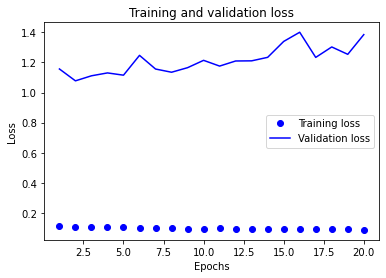

In [17]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

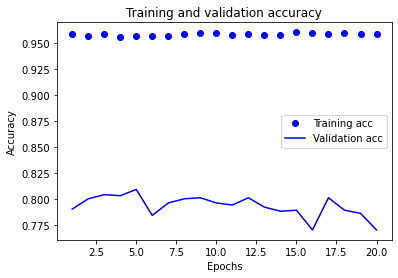

In [18]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()